In [6]:
#[데이터 모델링, SQL 응용]
#1-(1)

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [77]:
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
ohe = OneHotEncoder()

In [26]:
ohe = ohe.fit_transform(train[['Pclass']]).toarray()

In [27]:
print(ohe)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [28]:
#1-(2)

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
train['Age'].min()
train['Age'].max()
bins=np.linspace(train['Age'].min(), train['Age'].max(),5)
bins
train['Age']
train['Age'] = np.digitize(train['Age'],bins)
train['Age'].value_counts()

2    385
1    179
5    178
3    128
4     21
Name: Age, dtype: int64

In [79]:
#1-(3)

train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [80]:
train['Embarked'].isnull().sum()

2

In [81]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [82]:
train.drop([61,829], inplace=True)

In [83]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [84]:
ohe = OneHotEncoder()

In [85]:
ohe = ohe.fit_transform(train[['Embarked']]).toarray()

In [86]:
print(ohe)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
#2

bins = [5, 20, 30, 40, 60, 90]
labels = ["미성년자", "청년", "중년", "장년", "노년"]

In [87]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [90]:
survived = train[train['Survived']==0]
survived
dead = train[train['Survived']==1]
dead

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [219]:
bins = [5, 20, 30, 40, 60, 90]
labels = ['미성년자','청년','중년','장년','노년']
cats1 = pd.cut(survived['Age'], bins,labels=labels)
cats1

0       청년
4       중년
5      NaN
6       장년
7      NaN
      ... 
884     청년
885     중년
886     청년
888    NaN
890     중년
Name: Age, Length: 549, dtype: category
Categories (5, object): [미성년자 < 청년 < 중년 < 장년 < 노년]

In [220]:
cats2 = pd.cut(dead['Age'], bins,labels=labels)
cats2

1        중년
2        청년
3        중년
8        청년
9      미성년자
       ... 
875    미성년자
879      장년
880      청년
887    미성년자
889      청년
Name: Age, Length: 340, dtype: category
Categories (5, object): [미성년자 < 청년 < 중년 < 장년 < 노년]

In [221]:
cats1.value_counts(normalize=True)
cats2.value_counts(normalize=True)

청년      0.326848
중년      0.264591
미성년자    0.198444
장년      0.194553
노년      0.015564
Name: Age, dtype: float64

In [128]:
# [기초 알고리즘]
# 문제 1.

a = np.array([1,1,1,1,1,1,1,1,1,1])
a
len(a)

10

In [129]:
# 문제 2.

for i in range(10):
    if i==4:
        continue
    else:
        a[i]=0
print(a)

[0 0 0 0 1 0 0 0 0 0]


In [139]:
# 문제 3.

a = np.array([])
for i in range(10,21):
    a = np.append(a, i)
print(a)   

[10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]


In [150]:
# 문제 4.

np.sort(a)[::-1]

array([20., 19., 18., 17., 16., 15., 14., 13., 12., 11., 10.])

In [154]:
# 문제 5.

x = list(range(8))
x
a = np.array(x).reshape(2,4)
a

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [156]:
# 문제 6.

a = np.array( [1,2,0,0,4,0] )
a[a%2==0]

array([2, 0, 0, 4, 0])

In [157]:
# 문제 7

a = np.eye(2)
a

array([[1., 0.],
       [0., 1.]])

In [161]:
# 문제 8.

x = np.random.randn(9)
a = np.array(x).reshape(3,3)
a

array([[ 0.65792207,  0.88782146, -1.07451221],
       [ 0.58746166, -0.25960408, -1.16212927],
       [ 0.18982615, -1.15326652, -0.4257605 ]])

In [163]:
# 문제 9.

np.max(a)
np.min(a)

-1.1621292722182102

In [173]:
# 문제 10.

a
np.mean(a,axis=1)
np.mean(a,axis=0)

array([2.5, 3.5, 4.5])

In [214]:
# [Microsoft R 서버를 활용한 빅데이터 분석]

import pandas as pd
import seaborn as sns
tips = sns.load_dataset("tips") 
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [215]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [216]:
#1-(1)

tips['sex'] = tips['sex'].astype('object')

In [217]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(3), float64(2), int64(1), object(1)
memory usage: 8.8+ KB


In [119]:
#1-(2)

tips.loc[[1,3,5,7],'tip'] = 'missing'
tips.loc[[1,3,5,7]]

,total_bill,tip,sex,smoker,day,time,size
1,10.34,missing,Male,No,Sun,Dinner,3
3,23.68,missing,Male,No,Sun,Dinner,2
5,25.29,missing,Male,No,Sun,Dinner,4
7,26.88,missing,Male,No,Sun,Dinner,4


In [207]:
# [파이썬 기본문법과 통계기초]

money = int(input())

#500원
a = money//500
money = money-500*a
print('500원:',a)

#100원
b = money//100
money = money-100*b
print('100원:',b)

#50원
c = money//50
money = money-50*c
print('50원:',c)

#10원
d = money//10
money = money-10*d
print('10원:',d)

#나머지
print('나머지:',money)

7777
500원: 15
100원: 2
50원: 1
10원: 2
나머지: 7


In [179]:
# [파이썬 패키지를 활용한 데이터 시각화]

train = pd.read_csv('train (2).csv', parse_dates=['datetime'])
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [195]:
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek

In [196]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


In [197]:
import matplotlib.pyplot as plt

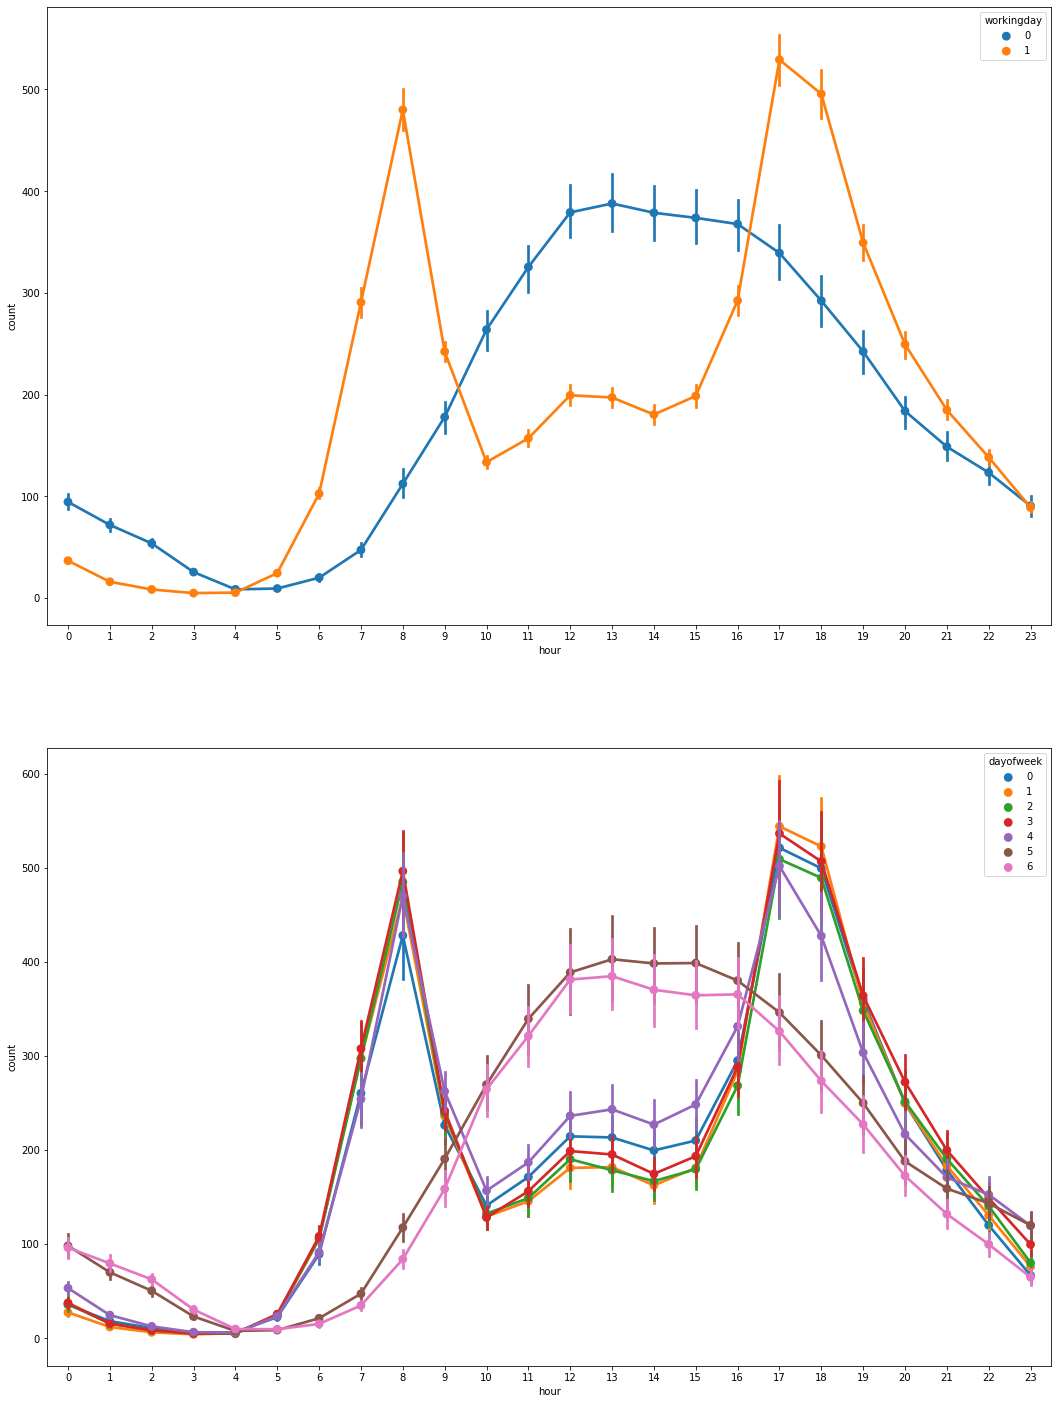

In [198]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
fig. set_size_inches(18,25)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax2)